In [ ]:
import os
import pandas as pd
import glob
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [ ]:
df = pd.read_feather('SM_Cleaned.feather')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49767 entries, 2023-08-01 00:00:00 to 2024-07-17 00:00:00
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   R             49767 non-null  float64
 1   Y             49767 non-null  float64
 2   B             49767 non-null  float64
 3   Active Power  49767 non-null  float64
 4   Date          49767 non-null  object 
 5   Hour          49767 non-null  int32  
 6   Month         49767 non-null  int32  
 7   Year          49767 non-null  int32  
 8   Weekday       49767 non-null  int32  
 9   Is_Weekday    49767 non-null  int64  
dtypes: float64(4), int32(4), int64(1), object(1)
memory usage: 3.4+ MB


In [ ]:
df.describe()

,R,Y,B,Active Power,Hour,Month,Year,Weekday,Is_Weekday
count,49767.000000,49767.000000,49767.000000,49767.000000,49767.000000,49767.000000,49767.000000,49767.000000,49767.000000
mean,1.469544,1.941460,1.354712,4.765717,11.485824,6.594531,2023.541202,2.982358,0.717765
std,0.645923,1.004455,0.750910,1.945388,6.914439,3.534386,0.498305,1.994943,0.450092
min,0.750000,0.360000,0.520000,2.010000,0.000000,1.000000,2023.000000,0.000000,0.000000
25%,1.080000,1.020000,0.990000,3.270000,6.000000,3.000000,2023.000000,1.000000,0.000000
50%,1.210000,1.880000,1.150000,4.460000,11.000000,7.000000,2024.000000,3.000000,1.000000
75%,1.590000,2.780000,1.370000,5.520000,17.000000,10.000000,2024.000000,5.000000,1.000000
max,6.600000,20.350000,7.270000,22.790000,23.000000,12.000000,2024.000000,6.000000,1.000000


In [ ]:
df.head()

,R,Y,B,Active Power,Date,Hour,Month,Year,Weekday,Is_Weekday
TIME,,,,,,,,,,
2023-08-01 00:00:00,1.17,0.64,0.96,2.77,2023-08-01,0,8,2023,1,1
2023-08-01 00:10:00,1.16,0.73,0.98,2.87,2023-08-01,0,8,2023,1,1
2023-08-01 00:20:00,1.19,0.72,0.98,2.89,2023-08-01,0,8,2023,1,1
2023-08-01 00:30:00,1.16,0.73,0.97,2.86,2023-08-01,0,8,2023,1,1
2023-08-01 00:40:00,1.20,0.74,0.99,2.93,2023-08-01,0,8,2023,1,1


In [ ]:
numeric_cols = df.select_dtypes(include=['number']).columns

# Resample the data to daily intervals and calculate the mean for each day
df_daily = df[numeric_cols].resample('d').mean()

In [ ]:
df_daily.head()

,R,Y,B,Active Power,Hour,Month,Year,Weekday,Is_Weekday
TIME,,,,,,,,,
2023-08-01,1.478966,1.015379,1.562345,4.056690,11.413793,8.0,2023.0,1.0,1.0
2023-08-02,1.584931,1.131528,1.581528,4.297986,11.500000,8.0,2023.0,2.0,1.0
2023-08-03,1.401042,1.097778,1.316458,3.815278,11.500000,8.0,2023.0,3.0,1.0
2023-08-04,1.316458,1.087361,1.357431,3.761250,11.500000,8.0,2023.0,4.0,1.0
2023-08-05,1.144792,0.852639,0.844722,2.842153,11.493056,8.0,2023.0,5.0,0.0


In [ ]:
df_daily = df_daily.reset_index()

ARIMA MODEL

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [ ]:
df_power = df_daily["Active Power"]
print(df_power.isnull().sum())

8


In [ ]:
df_power.fillna(method='ffill',inplace=True)

C:\Users\sawan\AppData\Local\Temp\ipykernel_9400\1671933189.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_power.fillna(method='ffill',inplace=True)


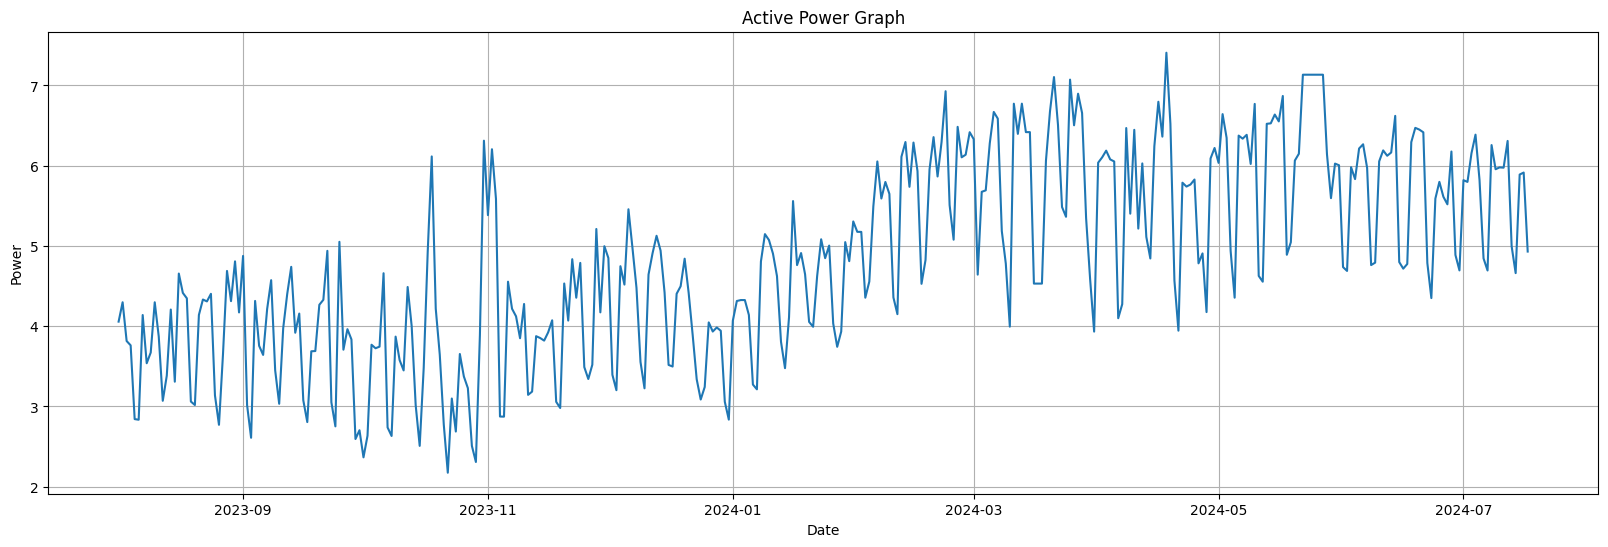

In [ ]:
plt.figure(figsize=(20,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Power')
plt.plot(df_daily["TIME"], df_daily["Active Power"])
plt.title('Active Power Graph')
plt.show()

<Axes: ylabel='Density'>

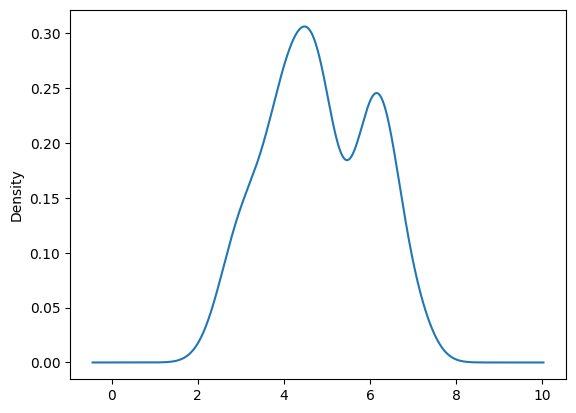

In [ ]:
df_power.plot(kind='kde')

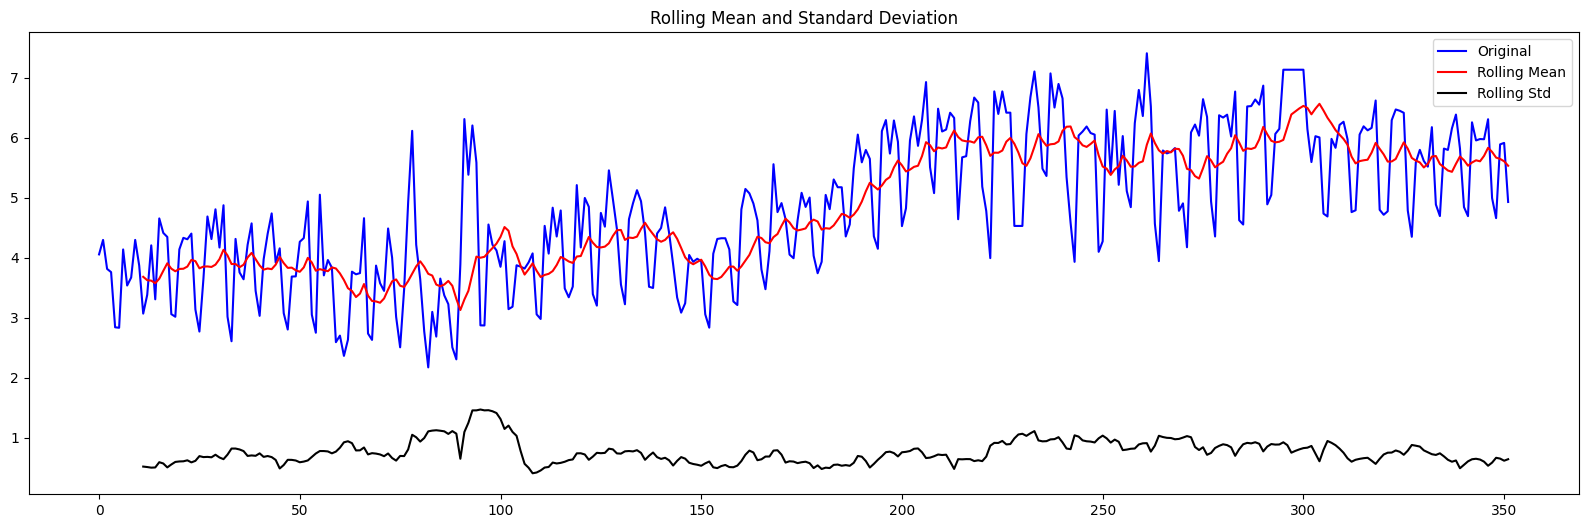

Results of dickey fuller test
Test Statistics                 -1.337126
p-value                          0.612021
No. of lags used                15.000000
Number of observations used    336.000000
critical value (1%)             -3.449963
critical value (5%)             -2.870181
critical value (10%)            -2.571373
dtype: float64


In [ ]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.figure(figsize=(20,6))
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(df_power)

<Figure size 640x480 with 0 Axes>

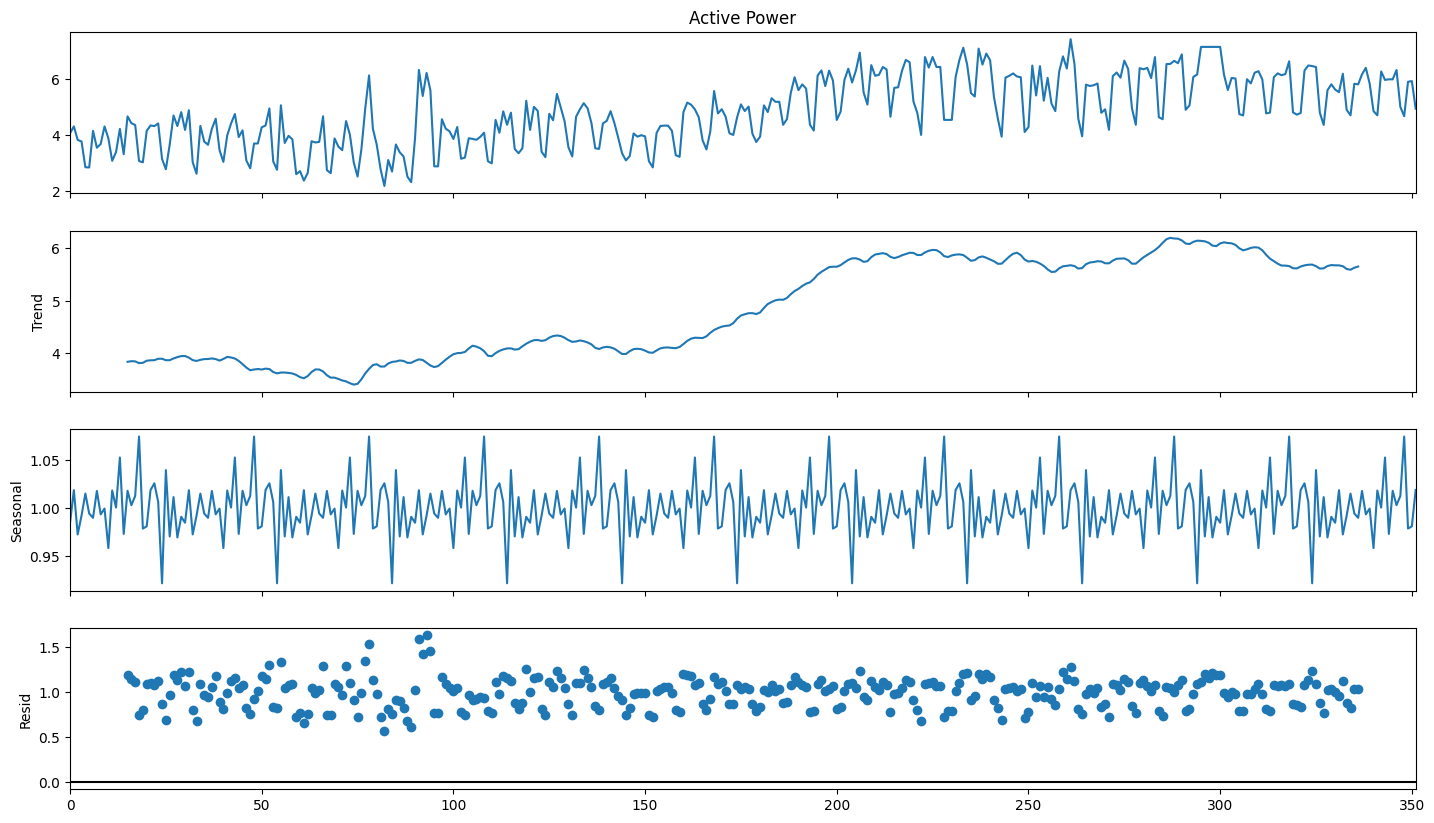

In [ ]:
# Decompose the time series
result = seasonal_decompose(df_power, model='multiplicative', period = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

C:\Users\sawan\AppData\Local\Temp\ipykernel_9400\1537244252.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='best')


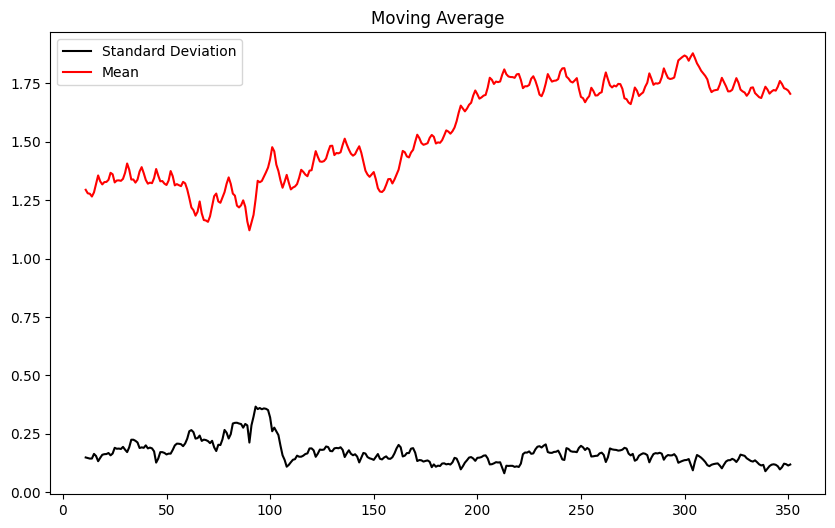

In [ ]:
#if not stationary then eliminate trend
#Eliminate trend
plt.figure(figsize=(10, 6))
df_log = np.log(df_power)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

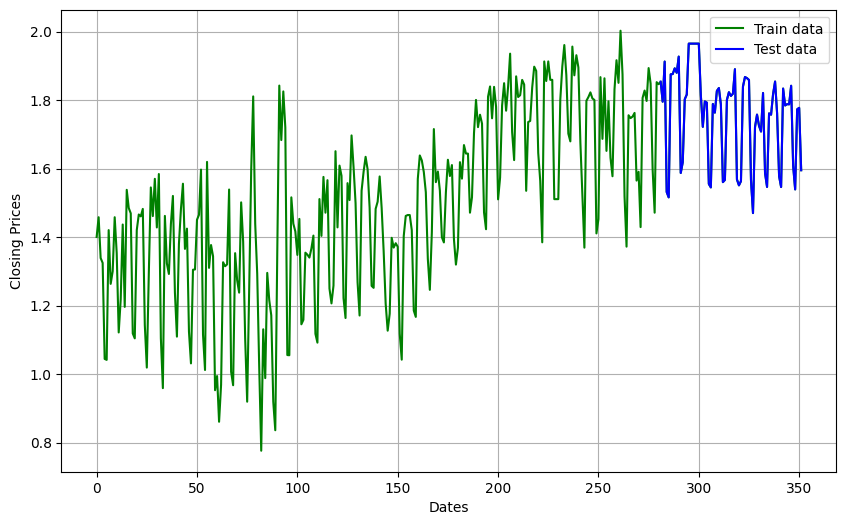

In [ ]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.8)], df_log[int(len(df_log)*0.8):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()
plt.show()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-92.927, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-93.347, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-119.537, Time=0.59 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-94.904, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-168.735, Time=0.21 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-188.295, Time=0.32 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-113.219, Time=0.12 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-190.142, Time=0.50 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-117.854, Time=0.30 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-184.410, Time=0.78 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-196.142, Time=1.26 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-181.950, Time=0.63 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-256.447, Time=0.61 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-179.366, Time=0.27 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   

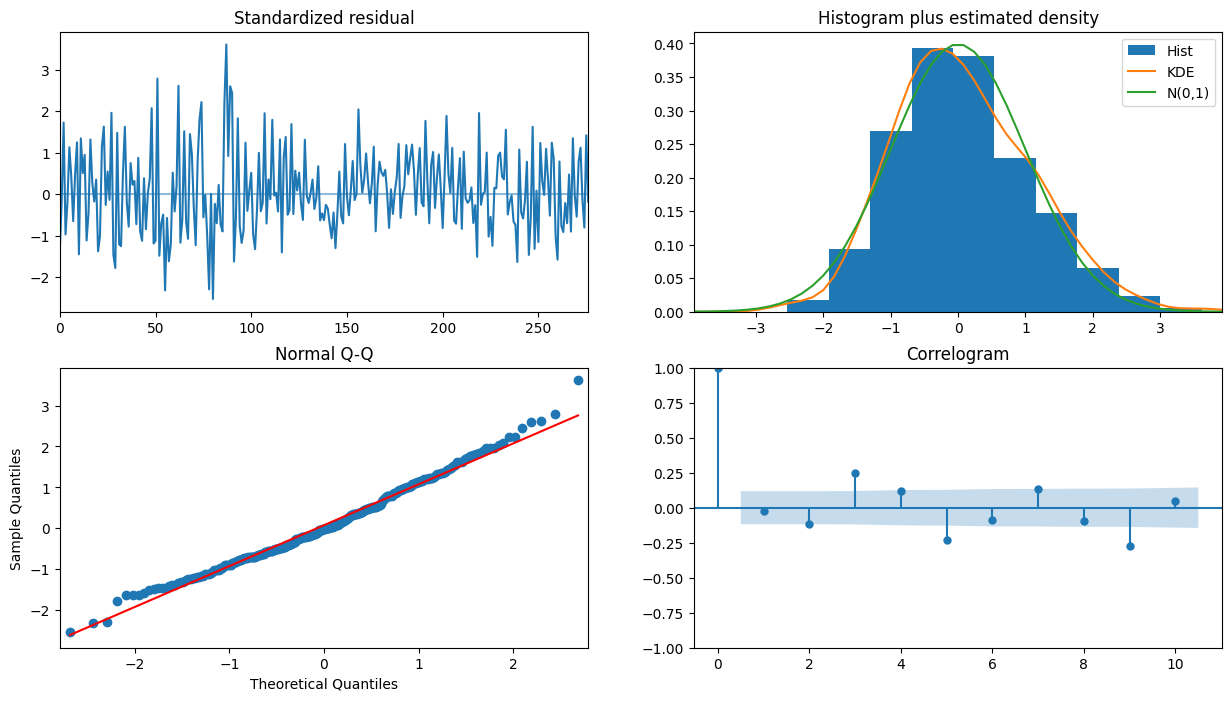

In [ ]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [ ]:

#Modeling
# Build Model
model = ARIMA(train_data, order=(3,1,3))  
fitted = model.fit()  
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:           Active Power   No. Observations:                  278
Model:                 ARIMA(3, 1, 3)   Log Likelihood                 147.881
Date:                Sat, 19 Oct 2024   AIC                           -281.761
Time:                        18:41:01   BIC                           -256.393
Sample:                             0   HQIC                          -271.583
                                - 278                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4249      0.068     20.843      0.000       1.291       1.559
ar.L2         -1.2223      0.086    -14.283      0.000      -1.390      -1.055
ar.L3          0.1787      0.069      2.607      0.0

c:\Users\sawan\OneDrive - Indian Institute of Science\Python\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


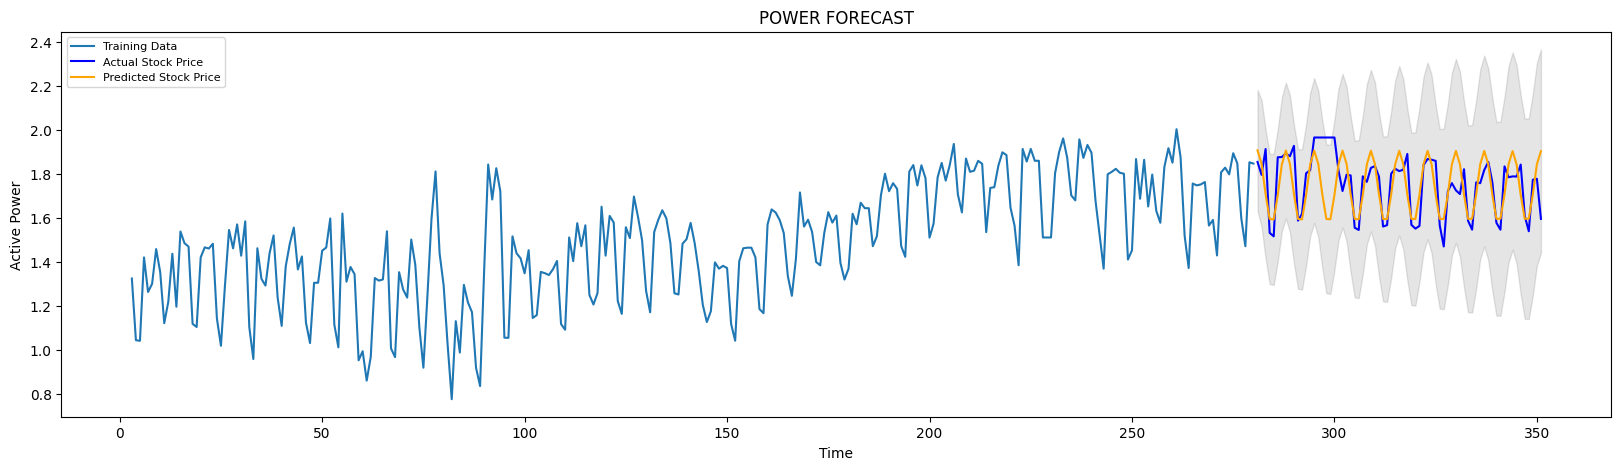

In [ ]:
# Forecast
forecast_results = fitted.get_forecast(steps=len(test_data))  # Change 321 to len(test_data)

# Extract forecast values, standard error, and confidence intervals
fc_series = forecast_results.predicted_mean
se = forecast_results.se_mean
conf = forecast_results.conf_int()

# Make as pandas series
lower_series = pd.Series(conf.iloc[:, 0], index=test_data.index)
upper_series = pd.Series(conf.iloc[:, 1], index=test_data.index)

# Plot
plt.figure(figsize=(20, 5), dpi=100)
plt.plot(train_data, label='Training Data')
plt.plot(test_data, color='blue', label='Actual Stock Price')
plt.plot(fc_series, color='orange', label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.title('POWER FORECAST')
plt.xlabel('Time')
plt.ylabel('Active Power')
plt.legend(loc='upper left', fontsize=8)
plt.show()


In [ ]:
# Calculate metrics
mse = mean_squared_error(test_data, fc_series)
print('MSE: ' + str(mse))

mae = mean_absolute_error(test_data, fc_series)
print('MAE: ' + str(mae))

rmse = math.sqrt(mse)  # You can use mse directly here
print('RMSE: ' + str(rmse))

# MAPE calculation
mape = np.mean(np.abs((test_data - fc_series) / np.abs(test_data))) * 100  # Multiply by 100 for percentage
print('MAPE: ' + str(mape) + '%')

MSE: 0.014481661772809172
MAE: 0.08871359324433743
RMSE: 0.12033977635349491
MAPE: 4.959967900887948%


TIMEGPT

In [ ]:
from nixtla import NixtlaClient

In [ ]:
nixtla_client = NixtlaClient(
    api_key = 'nixtla-tok-HS9xPgiavIF72vj30cdkJLPBkMR1tyKcMtxj5AknZ2iUJU3mNGtlwy93JL0gI1x8vI5mjtL1gUfRpVo0'
)

In [ ]:
nixtla_client.validate_api_key()

True

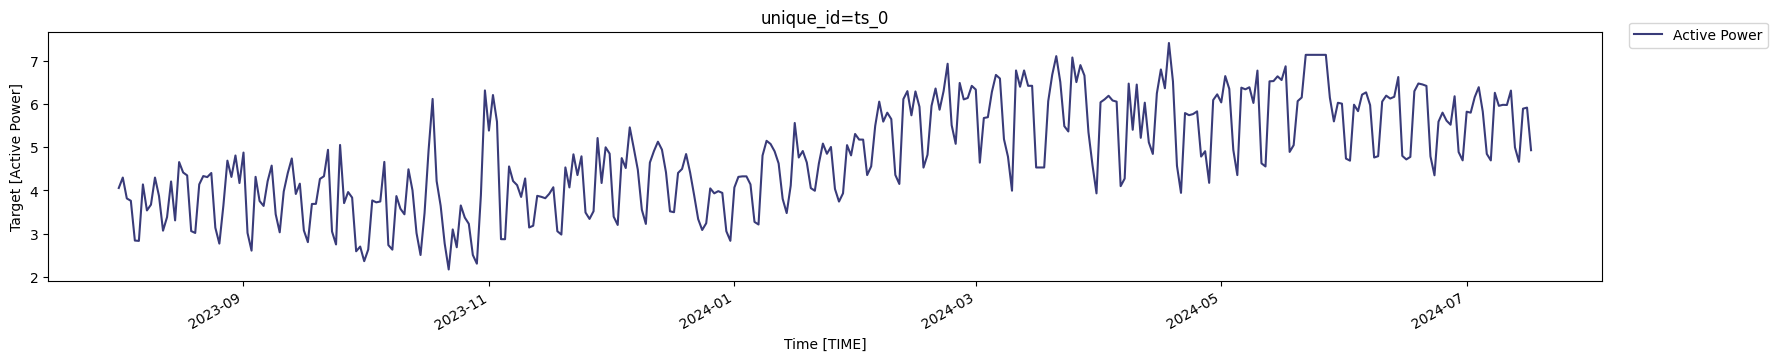

In [ ]:
nixtla_client.plot(df_daily, time_col='TIME', target_col='Active Power')

In [ ]:
# Converting 'datetime' column to datetime type
df_daily['TIME'] = pd.to_datetime(df_daily['TIME'])

# Check for duplicates based on the entire 'datetime' column
duplicates = df_daily[df_daily.duplicated(subset=['TIME'], keep=False)]
print("Duplicates found:")
print(duplicates)

Duplicates found:
Empty DataFrame
Columns: [TIME, R, Y, B, Active Power, Hour, Month, Year, Weekday, Is_Weekday]
Index: []


In [ ]:
df_daily = df_daily.fillna(method='ffill')

C:\Users\sawan\AppData\Local\Temp\ipykernel_9400\78904803.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_daily = df_daily.fillna(method='ffill')


In [ ]:
timegpt_fcst_df = nixtla_client.forecast(
    df=df_daily,  # Ensure df_clean is the correctly formatted DataFrame
    h=30,         # Forecast horizon
    time_col='TIME',  # Name of the column with datetime information
    target_col='Active Power',  # Name of the column to forecast
    freq='D',     # Frequency unit for the data (e.g., 'H' for hourly)
    model='timegpt-1-long-horizon'  # Model type
)


INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


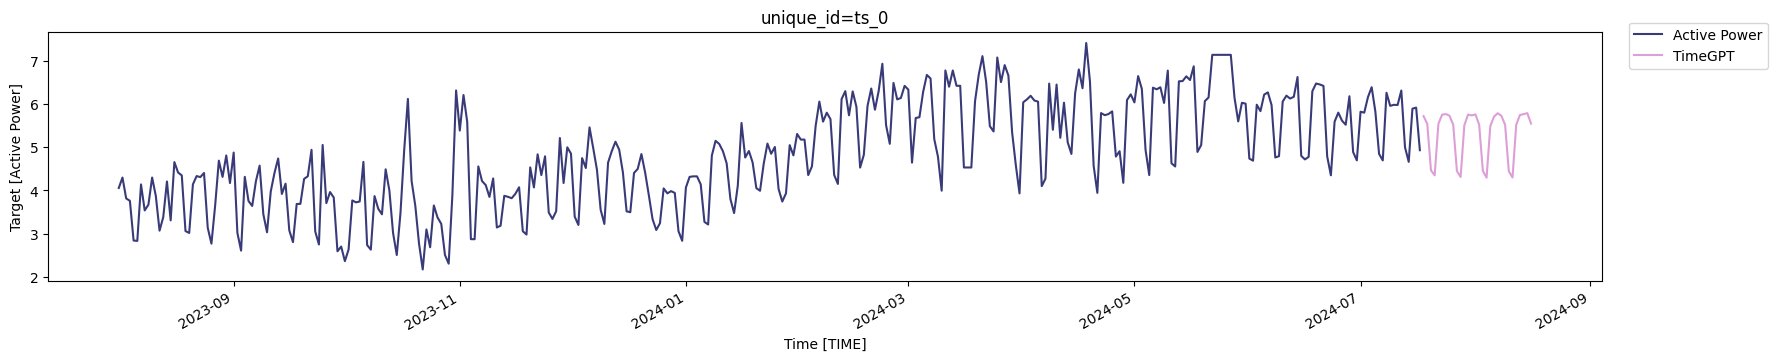

In [ ]:
nixtla_client.plot(df_daily, timegpt_fcst_df, time_col='TIME', target_col='Active Power')

In [ ]:
meta_energy_forecast = nixtla_client.forecast(
    df=df_daily,
    model="timegpt-1",
    h=30,
    level=[90],  # Generate a 90% confidence interval
    finetune_steps=200,  # Specify the number of steps for fine-tuning
    finetune_loss="mse",  # Specify the loss function for fine-tuning
    freq="B",
    time_col="TIME",
    target_col="Active Power",
    add_history=True
)
meta_energy_forecast.tail()

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
c:\Users\sawan\OneDrive - Indian Institute of Science\Python\Lib\site-packages\utilsforecast\preprocessing.py:188: UserWarning: Some values were lost during filling, please make sure that all your times meet the specified frequency.
For example if you have 'W-TUE' as your frequency, make sure that all your times are actually Tuesdays.
  warnings.warn(
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...
INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...


,TIME,TimeGPT,TimeGPT-lo-90,TimeGPT-hi-90
25,2024-08-22,6.007279,5.423726,6.590832
26,2024-08-23,5.930565,5.266767,6.594363
27,2024-08-26,5.838180,5.195097,6.481263
28,2024-08-27,6.035283,5.307499,6.763067
29,2024-08-28,6.043371,5.537241,6.549501


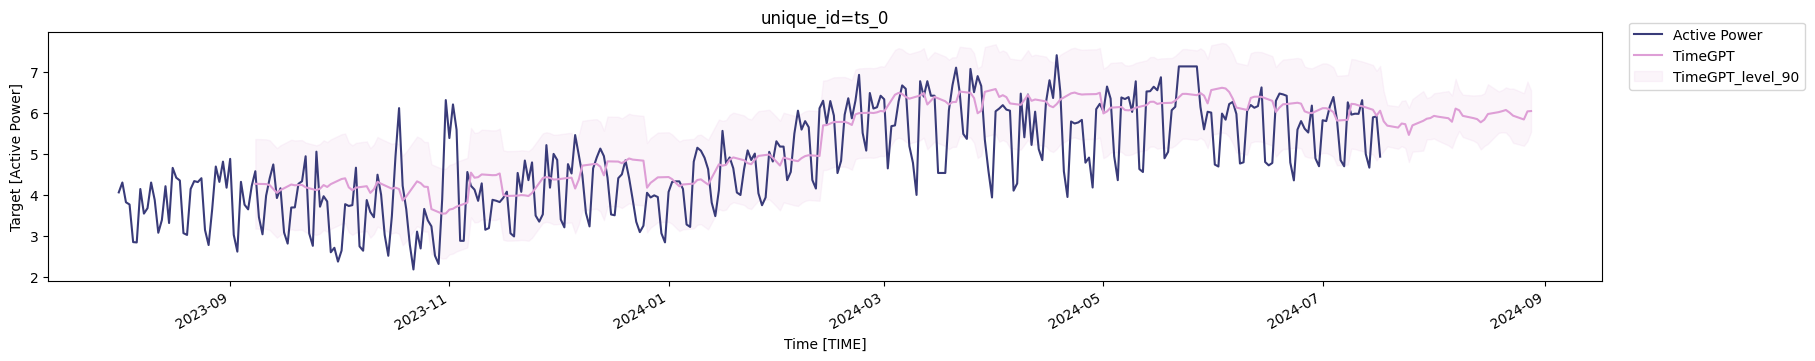

In [ ]:
nixtla_client.plot(
    df_daily,
    meta_energy_forecast,
    models=["TimeGPT"],
    level=[90],
    time_col="TIME",
    target_col="Active Power",
)

In [ ]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming 'df_daily' contains actual values and 'meta_energy_forecast' contains forecasted values

# Extract the time period where forecast exists (30 steps ahead)
forecast_start_time = meta_energy_forecast['TIME'].min()
forecast_end_time = meta_energy_forecast['TIME'].max()

# Filter the actual values for the same time range as the forecast
actual_values = df_daily[(df_daily['TIME'] >= forecast_start_time) & (df_daily['TIME'] <= forecast_end_time)]
forecasted_values = meta_energy_forecast[['TIME', 'TimeGPT']]

# Convert both 'datetime' columns to datetime64[ns] type
actual_values['TIME'] = pd.to_datetime(actual_values['TIME'])
forecasted_values['TIME'] = pd.to_datetime(forecasted_values['TIME'])

# Align both actual and forecasted values based on the 'datetime' column
actual_vs_forecast = pd.merge(actual_values, forecasted_values, on='TIME', suffixes=('_actual', '_forecast'))

# Now calculate accuracy metrics (MAE, MSE, RMSE, etc.)
y_true = actual_vs_forecast['Active Power']
y_pred = actual_vs_forecast['TimeGPT']

# Mean Absolute Error
mae = mean_absolute_error(y_true, y_pred)
print("MAE:", mae)

# Mean Squared Error
mse = mean_squared_error(y_true, y_pred)
print("MSE:", mse)

# Root Mean Squared Error
rmse = mse ** 0.5
print("RMSE:", rmse)

# Mean Absolute Percentage Error
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print("MAPE:", mape)


MAE: 0.4958101281830917
MSE: 0.44102618309017366
RMSE: 0.6640980222001671
MAPE: 10.1244141395477


C:\Users\sawan\AppData\Local\Temp\ipykernel_9400\3184943001.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual_values['TIME'] = pd.to_datetime(actual_values['TIME'])
C:\Users\sawan\AppData\Local\Temp\ipykernel_9400\3184943001.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasted_values['TIME'] = pd.to_datetime(forecasted_values['TIME'])
